In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/INTERRUPCAO_CARGA.csv", sep=";")
df.head()

,cod_perturbacao,din_interrupcaocarga,id_subsistema,nom_subsistema,id_estado,nom_agente,val_cargainterrompida_mw,val_tempomedio_minutos,val_energianaosuprida_mwh,flg_envolveuredebasica,flg_envolveuredeoperacao
0,0413/2007,2007-01-01 13:25:00,NE,NORDESTE,BA,NEOENERGIA COELBA,73.00,59.0,71.783333,S,S
1,0414/2007,2007-01-02 00:19:00,N,NORTE,MA,EQUATORIAL MARANHAO,1.80,9.0,0.270000,S,S
2,0385/2007,2007-01-03 18:02:00,SE,SUDESTE/CENTRO-OESTE,GO,EQUATORIAL GOIÁS,16.57,6.0,1.657000,S,S
3,0390/2007,2007-01-04 22:22:00,SE,SUDESTE/CENTRO-OESTE,GO,EQUATORIAL GOIÁS,7.60,2.0,0.253333,N,S
4,0419/2007,2007-01-06 06:26:00,NE,NORDESTE,PE,NEOENERGIA PE,35.00,12.0,7.000000,S,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8006 entries, 0 to 8005
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cod_perturbacao            8006 non-null   object 
 1   din_interrupcaocarga       8006 non-null   object 
 2   id_subsistema              8006 non-null   object 
 3   nom_subsistema             8006 non-null   object 
 4   id_estado                  8006 non-null   object 
 5   nom_agente                 8006 non-null   object 
 6   val_cargainterrompida_mw   8006 non-null   float64
 7   val_tempomedio_minutos     8006 non-null   float64
 8   val_energianaosuprida_mwh  8006 non-null   float64
 9   flg_envolveuredebasica     8006 non-null   object 
 10  flg_envolveuredeoperacao   8006 non-null   object 
dtypes: float64(3), object(8)
memory usage: 688.1+ KB


In [4]:
# --- Célula de Limpeza e Filtragem (VERSÃO FINAL COM CONFIG.PY) ---
import sys
# Adiciona a pasta raiz ao path para que possamos importar o config.py
sys.path.append('..') 
from config import START_YEAR, END_YEAR

# Converter a coluna de data para o formato datetime do pandas
df['timestamp'] = pd.to_datetime(df['din_interrupcaocarga'])

# Filtrar o dataset para manter apenas os eventos de Goiás
df_goias = df[df['id_estado'] == 'GO'].copy()

# --- FILTRO DE DATA ATUALIZADO ---
# Gera a lista de anos com base no nosso arquivo de configuração
anos_de_interesse = range(START_YEAR, END_YEAR + 1)
# Filtramos o dataframe para manter APENAS os registros dos anos de interesse.
df_goias = df_goias[df_goias['timestamp'].dt.year.isin(anos_de_interesse)].copy()
# --------------------------------

# Definir o timestamp como o índice do DataFrame para facilitar a agregação
df_goias.set_index('timestamp', inplace=True)

print(f"Dados de Interrupção filtrados para Goiás e para o período de {START_YEAR} a {END_YEAR}.")
display(df_goias.head())

Dados de Interrupção filtrados para Goiás e para o período de 2022 a 2025.


,cod_perturbacao,din_interrupcaocarga,id_subsistema,nom_subsistema,id_estado,nom_agente,val_cargainterrompida_mw,val_tempomedio_minutos,val_energianaosuprida_mwh,flg_envolveuredebasica,flg_envolveuredeoperacao
timestamp,,,,,,,,,,,
2022-01-02 23:44:00,43/2022,2022-01-02 23:44:00,SE,SUDESTE/CENTRO-OESTE,GO,ENELcdsa,3.00,1.0,0.050000,S,S
2022-01-07 18:50:00,0988/2022,2022-01-07 18:50:00,SE,SUDESTE/CENTRO-OESTE,GO,EQUATORIAL GOIÁS,10.00,5.0,0.833333,S,S
2022-01-08 15:42:00,174/2022,2022-01-08 15:42:00,SE,SUDESTE/CENTRO-OESTE,GO,EQUATORIAL GOIÁS,17.41,3.0,0.870500,S,S
2022-01-26 06:04:00,616/2022,2022-01-26 06:04:00,SE,SUDESTE/CENTRO-OESTE,GO,ENELPOWER,25.00,1.0,0.416667,N,N
2022-02-17 00:11:00,1145/2022,2022-02-17 00:11:00,SE,SUDESTE/CENTRO-OESTE,GO,EQUATORIAL GOIÁS,10.00,255.8,42.633333,S,S


In [5]:
deficit_diario = df_goias['val_energianaosuprida_mwh'].resample('D').sum()
deficit_diario = deficit_diario.fillna(0)
df_diario = deficit_diario.to_frame(name='deficit_diario_mwh')

print("Tabela de déficit diário para Goiás:")
display(df_diario.head()) # <-- Queremos ver a saída desta linha

Tabela de déficit diário para Goiás:


,deficit_diario_mwh
timestamp,
2022-01-02,0.05
2022-01-03,0.00
2022-01-04,0.00
2022-01-05,0.00
2022-01-06,0.00


In [6]:
# --- Célula de Classificação de Risco (VERSÃO COM LIMIARES AJUSTADOS) ---

# (O início da célula, que cria o df_diario, permanece o mesmo)
# ...

# Filtra apenas os dias onde houve algum déficit para calcular os quantis
dias_com_deficit = df_diario[df_diario['deficit_diario_mwh'] > 0]

# --- NOVOS LIMIARES AJUSTADOS ---
# Risco Alto: Definido como os 5% piores eventos de déficit (quantil 0.95).
limite_alto = dias_com_deficit['deficit_diario_mwh'].quantile(0.95)

# Risco Médio: Definido como os eventos entre o percentil 80 e 95.
limite_medio = dias_com_deficit['deficit_diario_mwh'].quantile(0.80)
# --------------------------------

print(f"Limiar para Risco Médio (P80): {limite_medio:.2f} MWh")
print(f"Limiar para Risco Alto (P95): {limite_alto:.2f} MWh")

def classificar_risco(deficit):
    # A ordem é importante: checamos do maior para o menor.
    # Usamos uma pequena tolerância (>= limite_alto) para garantir que o evento máximo entre.
    if deficit >= limite_alto and deficit > 0: # Garante que dias com 0 não sejam 'alto' se o limite for 0
        return 'alto'
    elif deficit >= limite_medio and deficit > 0: # Garante que dias com 0 não sejam 'medio'
        return 'medio'
    else:
        return 'baixo'

# Aplica a nova função para criar a coluna de nível de risco
df_diario['nivel_risco'] = df_diario['deficit_diario_mwh'].apply(classificar_risco)

# Verificação final da nova distribuição
print("\n--- Nova Contagem de Dias por Classe de Risco ---")
print(df_diario['nivel_risco'].value_counts())

# (O resto da célula, para salvar o arquivo, continua o mesmo)
# ...

Limiar para Risco Médio (P80): 19.13 MWh
Limiar para Risco Alto (P95): 118.37 MWh

--- Nova Contagem de Dias por Classe de Risco ---
nivel_risco
baixo    1330
medio      14
alto        5
Name: count, dtype: int64


## Desbalanceamento da classe

Os dados são muito desbalanceados, sendo a maioria dos níveis de risco baixos.

Distribuição das classes de risco:
nivel_risco
baixo    1330
medio      14
alto        5
Name: count, dtype: int64


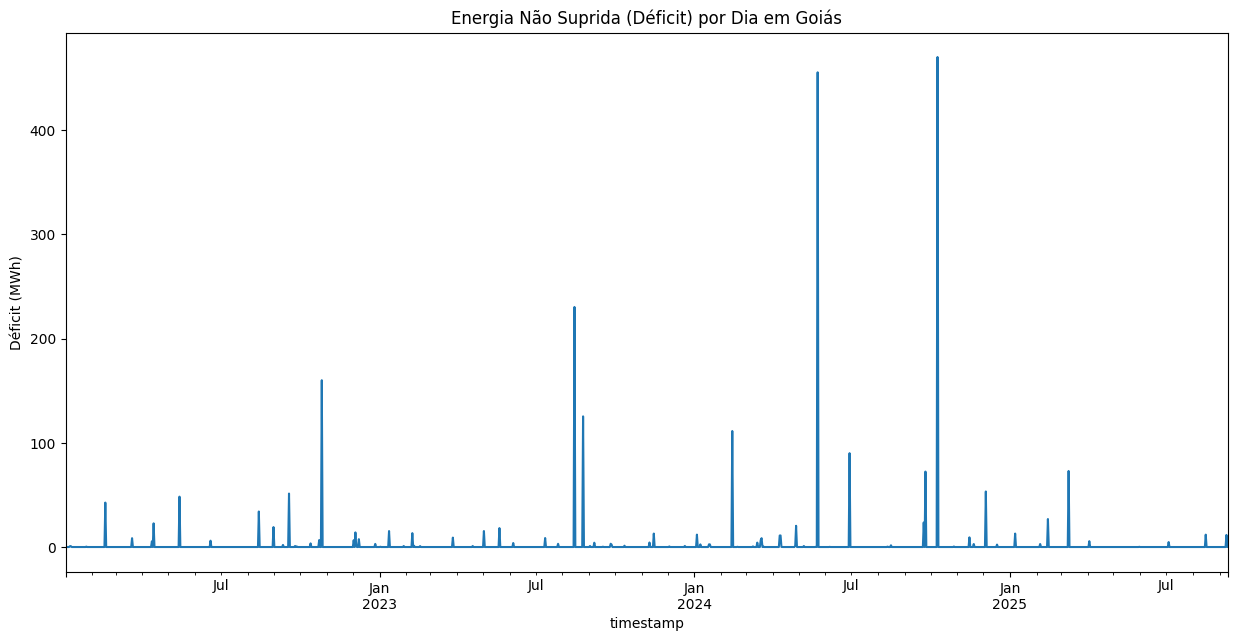

In [7]:
# Verificar a distribuição das classes de risco
print("Distribuição das classes de risco:")
print(df_diario['nivel_risco'].value_counts())

# Plotar os déficits diários para visualizar os eventos
plt.figure(figsize=(15,7))
plt.title('Energia Não Suprida (Déficit) por Dia em Goiás')
df_diario['deficit_diario_mwh'].plot()
plt.ylabel('Déficit (MWh)')
plt.show()

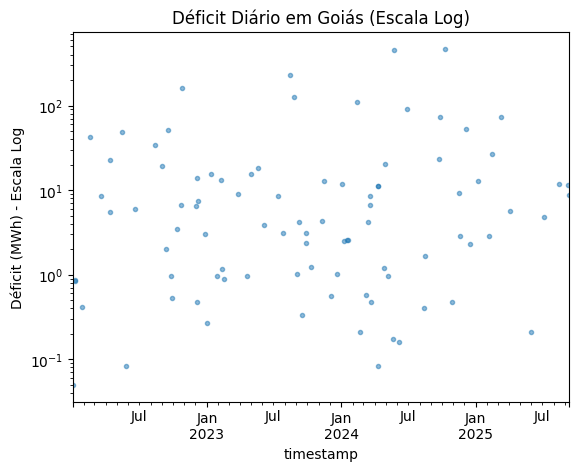

In [8]:
# Adicionar este código para um novo gráfico
plt.figure()
plt.title('Déficit Diário em Goiás (Escala Log)')
ax = df_diario['deficit_diario_mwh'].plot(logy=True, style='.', alpha=0.5)
ax.set_ylabel("Déficit (MWh) - Escala Log")
plt.show()

In [9]:
# Adicionar no final do notebook
output_path = '../data/processed/target_variable_daily.parquet'
df_diario.to_parquet(output_path)
print(f"DataFrame final salvo em: {output_path}")

DataFrame final salvo em: ../data/processed/target_variable_daily.parquet
